In [1]:
import warnings
warnings.filterwarnings("ignore")

# Import Libraries

In [2]:
#data analysis
import pandas as pd
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import cross_validation
from sklearn import metrics
import sklearn.linear_model as lm

C:\Users\User\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Load Data

# Question 0 [from last time] : Predicting Job Salary 

In [3]:
import pandas as pd # conventional alias

salary = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/salary_uk.csv")
#salary

In [4]:
salary.shape

(10000, 12)

In [5]:
salary.columns

Index(['Id', 'Title', 'FullDescription', 'LocationRaw', 'LocationNormalized',
       'ContractType', 'ContractTime', 'Company', 'Category', 'SalaryRaw',
       'SalaryNormalized', 'SourceName'],
      dtype='object')

# Preprocessing the Dataset

In [6]:
#Removing unwanted variables
salary_out = salary.drop([u'LocationRaw', u'SalaryRaw', u'SourceName'],axis =1)
salary_out.head(3)

,Id,Title,FullDescription,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryNormalized
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,25000
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,30000
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,30000


In [7]:
salary_out.columns

Index(['Id', 'Title', 'FullDescription', 'LocationNormalized', 'ContractType',
       'ContractTime', 'Company', 'Category', 'SalaryNormalized'],
      dtype='object')

In [8]:
#Converting Title and FullDescription into vectors
vector = CountVectorizer()
X = vector.fit_transform(salary_out['Title'].values.astype('str'))
Title = pd.DataFrame(X.toarray(), columns=vector.get_feature_names())
X = vector.fit_transform(salary_out['FullDescription'].values.astype('str'))
FullDescription = pd.DataFrame(X.toarray(), columns=vector.get_feature_names())

In [9]:
#Merging the variables
salary_mer = pd.merge(salary_out, Title, left_index=True, right_index=True)
salary_merg = pd.merge(salary_mer, FullDescription, left_index=True, right_index=True)
salary_merg_dr = salary_merg.drop(['Title','FullDescription'], axis = 1)
#salary_merg_dr.columns

In [10]:
salary_dum = pd.get_dummies(salary_merg_dr, columns =[u'LocationNormalized',
       u'ContractType', u'ContractTime', u'Company', u'Category'])
salary_dum.head(3)

,Id,SalaryNormalized,10_x,100_x,1000_x,11_x,11501250,12_x,140_x,15_x,...,Category_Other/General Jobs,"Category_PR, Advertising & Marketing Jobs",Category_Property Jobs,Category_Retail Jobs,Category_Sales Jobs,Category_Scientific & QA Jobs,Category_Social work Jobs,Category_Teaching Jobs,Category_Trade & Construction Jobs,Category_Travel Jobs
0,12612628,25000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12612830,30000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12612844,30000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Train and Test Datasets

In [11]:
#SalaryNormalized as the response variables
y_salary_dum=salary_dum['SalaryNormalized']
y_salary_dum.shape

(10000,)

In [12]:
#all variables except SalaryNormalized
X_salary_dum=salary_dum.drop('SalaryNormalized',axis=1)
X_salary_dum.shape

(10000, 33207)

In [13]:
#I had to use PCA of 700 because my computer was slow
from sklearn.decomposition import PCA
salary_pca = PCA(n_components=700)
salary_pca.fit(X_salary_dum)
X_salary_dum = salary_pca.transform(X_salary_dum)
X_salary_dum.shape

(10000, 700)

In [32]:
#dividing dataset into 25% being testing and 75% being training

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_salary_dum, y_salary_dum,
                                                random_state=1, test_size=0.25)
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (7500, 700)
X_test shape: (2500, 700)
y_train shape: (7500,)
y_test shape: (2500,)


# KNeighbors Regressor

In [33]:
from sklearn.neighbors import KNeighborsRegressor
# instantiate the model and set the number of neighbors to consider to 3:
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets:
reg.fit(X_train, y_train)
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.07


In [34]:
# instantiate the model and set the number of neighbors to consider to 10:
reg = KNeighborsRegressor(n_neighbors=10)
# fit the model using the training data and training targets:
reg.fit(X_train, y_train)
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.11


In [35]:
# instantiate the model and set the number of neighbors to consider to 15:
reg = KNeighborsRegressor(n_neighbors=15)
# fit the model using the training data and training targets:
reg.fit(X_train, y_train)
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.12


# Linear Regression aka Ordinary Least Squares

In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.62
Test set score: 0.51


# Ridge regression

In [37]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.62
Test set score: 0.51


In [38]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.62
Test set score: 0.52


In [39]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.62
Test set score: 0.51


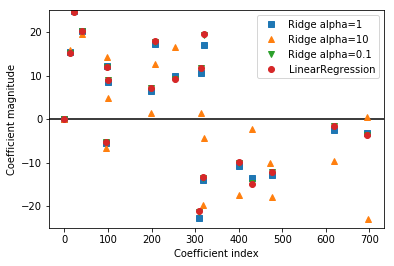

In [40]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

# Lasso

In [41]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.62
Test set score: 0.52
Number of features used: 694


In [42]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.62
Test set score: 0.51
Number of features used: 700


In [43]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.62
Test set score: 0.51
Number of features used: 700


Text(0,0.5,'Coefficient magnitude')

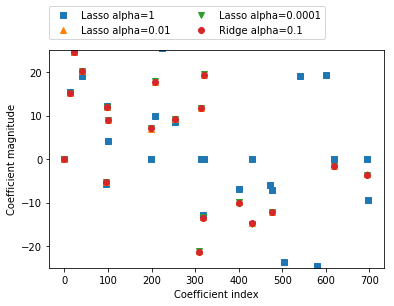

In [44]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

# DecisionTree Regressor

In [45]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(X_train, y_train)
print("Training set score: {:.2f}".format(tree.score(X_train, y_train)))
print("Test set score: {:.2f}".format(tree.score(X_test, y_test)))

Training set score: 1.00
Test set score: -0.28


# RandomForest Regressor


In [46]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor().fit(X_train, y_train)
print("Training set score: {:.2f}".format(rfr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(rfr.score(X_test, y_test)))


Training set score: 0.88
Test set score: 0.35


# Gradient Boosted Regression


In [47]:
from sklearn.ensemble import GradientBoostingRegressor
gbtr = GradientBoostingRegressor().fit(X_train, y_train)
print("Training set score: {:.2f}".format(gbtr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(gbtr.score(X_train, y_train)))

Training set score: 0.57
Test set score: 0.57


# Summary

In [49]:
decision=pd.DataFrame({'Reg_Types':['kNeighbors_3','kNeighbors_10','kNeighbors_15','Linear_Reg','Ridge_1','Ridge_10','Ridge_0.1',
                                    'lasso','lasso001','lasso00001','Decision_Tree','Random_Forest',
                              'Gradient_Boosted'],'Test':[.07,0.11,0.12,0.51,0.51,0.52,0.51,0.52,
                                                         0.51,0.51,-0.28,0.35,0.57]})
decision


,Reg_Types,Test
0,kNeighbors_3,0.07
1,kNeighbors_10,0.11
2,kNeighbors_15,0.12
3,Linear_Reg,0.51
4,Ridge_1,0.51
5,Ridge_10,0.52
6,Ridge_0.1,0.51
7,lasso,0.52
8,lasso001,0.51
9,lasso00001,0.51


In [ ]:
#SalaryNormalized as the response variables was continuous
#Once it was continuous, regression was considered under the supervised learning
#It was quite amazing we had decision tree with a negative test score(-0.28)
#Gradient boosted had the highest test score(0.57), hence we assume 
#Gradient Boosting Regression as the best model